In [1]:
# -*- coding: utf-8 -*-

# Copyright (c) 2017-present, WawLabs.
# All rights reserved.

import requests
import json
import cv2
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
file_path = "data/sample.jpg"

In [3]:
url = "https://wawapps.com/api/car_cl_2"

In [4]:
fin =  open(file_path, 'rb')
files = {'file': fin}

try:
    r = requests.post(url, files=files, verify = False)
finally:
    fin.close()

C:\Anaconda2\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [5]:
json_data = json.loads(r.text)

In [6]:
json_data

[{u'coords': [447, 727, 173, 339],
  u'marka_preds': [{u'peugeot': u'99.94052648544312'},
   {u'unknown': u'0.059100554790347815'},
   {u'mercedes - benz': u'0.0003339945806146716'},
   {u'volvo': u'1.4417402383060107e-05'},
   {u'opel': u'8.977394116982396e-06'}],
  u'model_preds': [{u'peugeot:308': u'99.93844032287598'},
   {u'unknown': u'0.02826108247973025'},
   {u'peugeot:207': u'0.018773585907183588'},
   {u'peugeot:rcz': u'0.005962214709143154'},
   {u'peugeot:307': u'0.0048407418944407254'}]},
 {u'coords': [251, 478, 172, 345],
  u'marka_preds': [{u'dacia': u'99.95937943458557'},
   {u'honda': u'0.01749169168761'},
   {u'renault': u'0.011939099204028025'},
   {u'unknown': u'0.01114507467718795'},
   {u'nissan': u'5.04088461639185e-05'}],
  u'model_preds': [{u'dacia:sandero': u'99.94959831237793'},
   {u'honda:jazz': u'0.030079088173806667'},
   {u'dacia:logan': u'0.014513538917526603'},
   {u'renault:symbol': u'0.0027707765184459276'},
   {u'unknown': u'0.0027358177248970605'}]

In [7]:
img = cv2.imread(file_path)

In [8]:
for i in range(len(json_data)):
    coords = json_data[i]['coords']
    xStart = coords[0]
    xEnd = coords[1]
    yStart = coords[2]
    yEnd   = coords[3]
    
    cv2.rectangle(img, (xStart, yStart), (xEnd, yEnd),(255,255,255), 2)
    
    label = list(json_data[i]['model_preds'][0].keys())[0] + " : " + "%.1f" % np.float32((json_data[i]['model_preds'][0][list(json_data[i]['model_preds'][0].keys())[0]]))
    
    labelSize, baseLine = cv2.getTextSize(label, cv2.FONT_HERSHEY_COMPLEX_SMALL, 1.0, 1)
    
    cv2.putText(img, label, (xStart, yStart - labelSize[1]),cv2.FONT_HERSHEY_COMPLEX_SMALL, 1.0, (255,255,255), 2)

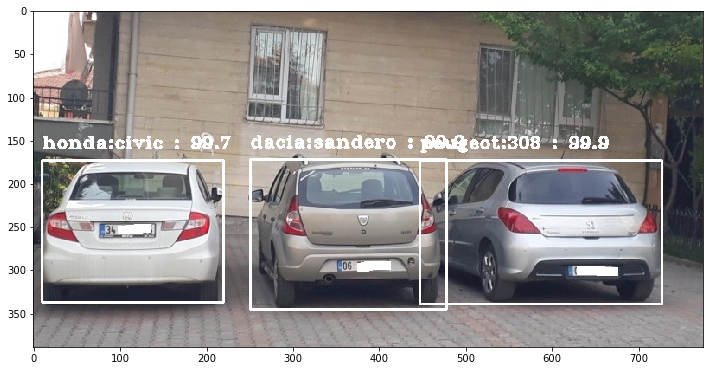

In [9]:
plt.figure(figsize=(12,8))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [10]:
cv2.imshow("", img)
cv2.waitKey(0)
cv2.destroyAllWindows()